# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [2]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp


In [3]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)


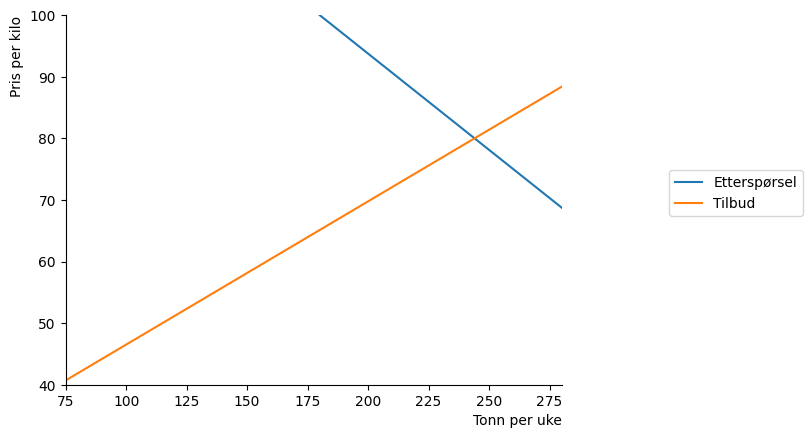

In [4]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).

Mva gjør tilbudet dyrere, i tillegg til en økning i pris for konsument, minker også etterspørselen, som fører til en brattere helning.

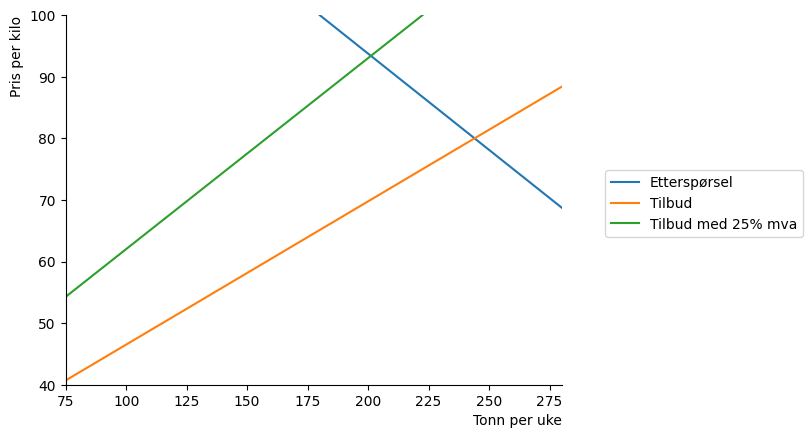

In [5]:
fig, ax = create_ax()

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s(p_num, 1/4),p_num, label='Tilbud med 25% mva')

ax.legend(bbox_to_anchor=(1.5,0.6));



2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.

In [6]:
#Lager ny funksjon for tilbud

def x_d2(p,T):
    return 500-3.2*p*(1+T)

#Legger inn symboler slik at funksjonene kan brukes med sympy
x,p,t,T=sp.symbols('x p t T', positive=True, real=True)


# sjekker betingelse for likevekt
eq_cond=sp.Eq(x_d2(p,T),x_s(p,t))

#løser for p
p_eq = sp.solve(eq_cond, p)

#finner tilsvarende for kvantum
x_eq=x_s(p_eq[0],t)
 


In [7]:
# Bruk sp.lambdify for å gjøre om sympy til numpy array

# Likevektspris som funksjon av t og T

p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)

In [8]:

p_mva_prod = round(p_eq_fn(0,1/4),2)
x_mva_prod = round(x_eq_fn(0,1/4),2)
p_mva_konsum = round(p_eq_fn(1/4,0),2)
x_mva_konsum = round(x_eq_fn(1/4,0),2)

p_u_mva = round(p_eq_fn(0,0),2)
x_u_mva = round(x_eq_fn(0,0),2)

print(f'''
Prisen er {p_mva_prod} med mva for prod 
Prisen er {p_mva_konsum} med mva for kunde 
Kvantum er {x_mva_prod} med mva for prod 
Kvantum er {x_mva_konsum} med mva for kunde''')

print(f'''
Prisen er {p_u_mva} uten mva 
Kvantum er {x_u_mva} uten mva ''')


Prisen er 72.29 med mva for prod 
Prisen er 93.39 med mva for kunde 
Kvantum er 210.84 med mva for prod 
Kvantum er 201.17 med mva for kunde

Prisen er 80.0 uten mva 
Kvantum er 244.0 uten mva 


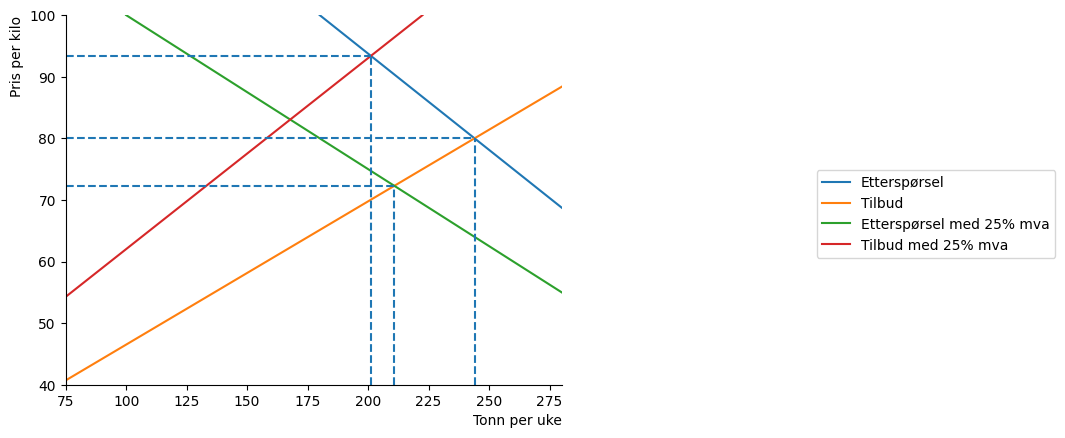

In [11]:
fig, ax = create_ax()

# plotter alle funksjonene sammen


ax.plot(x_d2(p_num, 0),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_d2(p_num, 1/4),p_num, label='Etterspørsel med 25% mva')

ax.plot(x_s(p_num, 1/4),p_num, label='Tilbud med 25% mva') 


ax.legend(bbox_to_anchor=(1.5,0.6));

#Viser likevektspunkt for konsument med mva
ax.vlines(x_eq_fn(1/4,0),40,93.39, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(1/4,0),75,201.17, linestyles='dashed', clip_on=False)

#Viser likevektspunkt uten mva
ax.vlines(x_eq_fn(0,0),40,80, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0,0),75,244, linestyles='dashed', clip_on=False)

#Viser likevektspunkt for produsent med mva
ax.vlines(x_eq_fn(0,1/4),40,72.29, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0,1/4),75,210.84, linestyles='dashed', clip_on=False)



3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.


In [10]:
u_mva = 80
kon_mva = p_eq_fn(1/4,0)
prod_mva = p_eq_fn(0,1/4)
kon = kon_mva - u_mva
prod = u_mva-prod_mva
stat = kon+prod
kon_pros = (kon/stat)*100
prod_pros = (prod/stat)*100


print(f'''
Staten tjener {round(stat,2)} på mva.
Andelen som betales av konsumenter er {round(kon,4)}, eller {round(kon_pros,2)}%
Produsenten betaler {round(prod,2)} av andelen, eller {round(prod_pros,2)}%.''')


Staten tjener 21.1 på mva.
Andelen som betales av konsumenter er 13.3852, eller 63.45%
Produsenten betaler 7.71 av andelen, eller 36.55%.


4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?

Fordelen med mva er at det er en fastsatt avgift som er allment kjent. En ulempe med mva som vist i figurene over er at det påvirker salg og etterspørsel siden varene blir dyrere, spesielt for konsumenten.
I motsetning til mva, finnes det mange faktorer når man skal regne ut stykkprisavgift. Ser vi på alkoholsalg, kan det f.eks være alkoholprosent, str på flaske. Det gjør det dermed mer utfordrende og finne en rettferdig avgift på varen. Fordelen med stykkprisskatt er at vi kjøper mindre, og at staten får mer midler.